In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import shutil
import os
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata

import grid_set as gs

from imp import reload
reload(gs)

<module 'grid_set' from '/Users/h/Github/geo_data_group/grid_set.py'>

In [2]:
m = ccrs.NorthPolarStereo

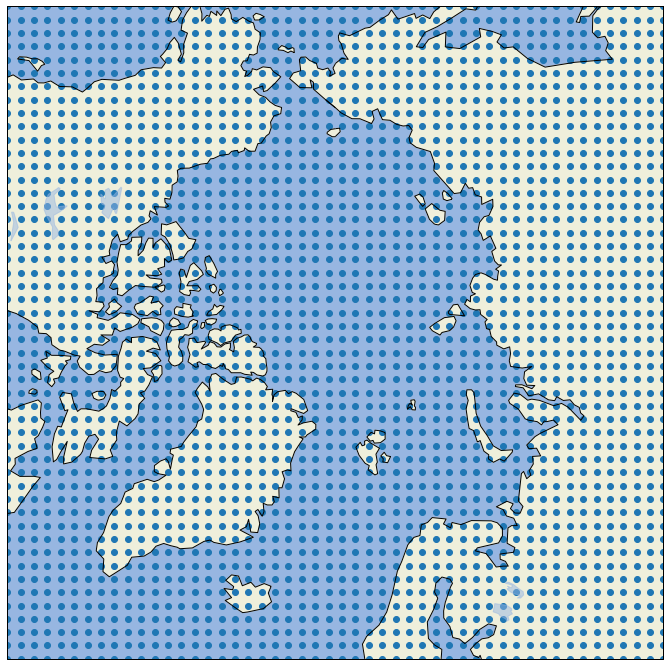

In [9]:
f = plt.figure(figsize=(12, 12))
ax = f.add_subplot(1,1,1,projection=m())
ax.set_extent([-180, 180, 60, 90], ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.RIVERS)
ax.scatter(testG.xpts,testG.ypts)
plt.show()


In [16]:
testG = gs.grid_set(m)

In [17]:
# testG.set_grid_dxy(100e3,100e3,ax=ax)
testG.set_grid_mn(50,50,ax=ax)


Got a grid res =  50  x  50


In [7]:
xmax, xmin = ax.get_xlim()
ymax, ymin = ax.get_ylim()

In [10]:
x,y = np.meshgrid(np.linspace(xmax,xmin,30),np.linspace(ymax,ymin,10))

In [35]:
lonlat = ccrs.PlateCarree().transform_points(m(),x,y)
# help(m.transform_point)

In [37]:
lonlat.shape
lon = lonlat[:,:,0]
lat = lonlat[:,:,1]

In [43]:
hasattr(testG,'ccrs')

True

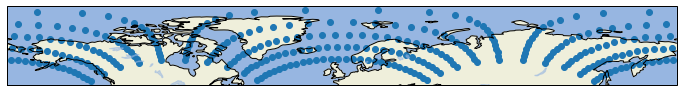

In [38]:
f = plt.figure(figsize=(12, 12))
ax = f.add_subplot(1,1,1,projection=ccrs.PlateCarree())

ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
# ax.add_feature(cfeature.RIVERS)
ax.scatter(lon,lat)

plt.show()


In [49]:
lmD =  Dataset("amsr_gsfc_6s.hdf",'r') 
lm = lmD.variables['landmask']
# lmD.close()
with open("pss06lats_v3.dat",'r') as f_lats:
    a_lats = np.divide(np.fromfile(f_lats, dtype=np.int32), 100000)
    lats = np.resize(a_lats, np.shape(lm))
    
with open("pss06lons_v3.dat",'r') as f_lons:
    a_lons = np.divide(np.fromfile(f_lons, dtype=np.int32), 100000)
    lons = np.resize(a_lons, np.shape(lm))

In [ ]:

        new_d_array[tt,:,:] = griddata((x_d.ravel(), y_d.ravel()),
                data[tt][:].ravel(), (grid_set.xpts.T, grid_set.ypts.T),

type

In [16]:
help(m.project_geometry)

Help on function project_geometry in module cartopy.crs:

project_geometry(self, geometry, src_crs=None)
    Project the given geometry into this projection.
    
    Parameters
    ----------
    geometry
        The geometry to (re-)project.
    src_crs: optional
        The source CRS.  Defaults to None.
    
        If src_crs is None, the source CRS is assumed to be a geodetic
        version of the target CRS.
    
    Returns
    -------
    geometry
        The projected result (a shapely geometry).

